This file is the main file where we define the problem data, initiate model and train the model

1. First we import all the relevant classes and libraries

In [ ]:
from physicsinformedQ2 import PhysicsInformedBarModel
import utilities
import numpy as np
import torch
import matplotlib.pyplot as plt

2. Analytical solution is derived for validation

In [ ]:
u_analytic = lambda x: (-(np.power(x,4)/24)+(np.power(x,3)/12)-(np.power(x,2)/24))

3. Problem data are defined. Here the known data like mechanical parameters, boundary condition and loading conditions are defined

In [ ]:
E = lambda x: 1
I = lambda x: 1
L = 1
u0 = [0,0]  # Dirichlet boundary conditions for both edges
u1 = [0,0]
distLoad = lambda x: 1

4. Next we generate the neural network model using the imported class PhysicsInformedBarModel

In [ ]:
pinnModel = PhysicsInformedBarModel(E, I, L, u0, u1, dist_load=distLoad)

check 2


5. Next we train our model. The method/function 'train' is defined in the class PhysicsInformedBarModel

In [ ]:
epochs = 500
learningRate = 1e-2

pinnModel.train(epochs, optimizer='LBFGS', lr=learningRate)

Epoch: 0/499		Differential equation loss = 54.065735		Boundary condition loss = 0.051667		Total loss = 54.117401
Epoch: 100/499		Differential equation loss = 0.000031		Boundary condition loss = 0.000536		Total loss = 0.000566
Epoch: 200/499		Differential equation loss = 0.000014		Boundary condition loss = 0.000000		Total loss = 0.000014
Epoch: 300/499		Differential equation loss = 0.000014		Boundary condition loss = 0.000000		Total loss = 0.000014
Epoch: 400/499		Differential equation loss = 0.000014		Boundary condition loss = 0.000000		Total loss = 0.000014
Epoch: 499/499		Differential equation loss = 0.000014		Boundary condition loss = 0.000000		Total loss = 0.000014


6. We generate sample test data using utilities library and then predict the displacements at those test points

In [ ]:
samples = 100
x_test = utilities.generate_grid_1d(L, samples)
u_test = pinnModel.get_displacements(x_test)

7. We plot predicted displacements at test points and also the training history

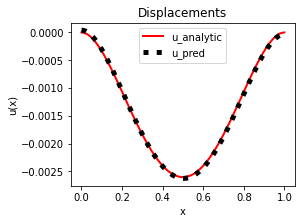

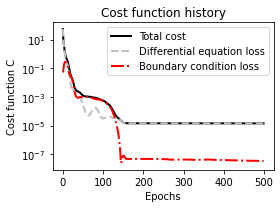

In [ ]:
utilities.plot_displacements_bar(x_test, u_test, u_analytic)

pinnModel.plot_training_history()
